In [6]:
import pandas as pd
import scanpy as sc
import numpy as np

In [7]:
datasets = ['HumanBoneMarrow', 'MouseBoneMarrow', 'MouseErythroid', 'Pancreas_with_cc', 'DentateGyrus']
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/'

In [8]:
comparison = ['scVelo', 'scVelo_stochastic', 'VeloVI', 'cell2fate', 'VeloVAE', 'DeepVelo', 'UniTVelo_unified',
             'UniTVelo_independent']
tab_summary = pd.DataFrame(columns = datasets, index = comparison)

In [9]:
for dataset in datasets:
    print(dataset)
    tab = pd.read_csv(save_dir + dataset + '_ICC_scores.csv', index_col = 0)
    tab_summary.loc[:,dataset] = tab.loc[comparison, 'Mean']
tab_summary.loc[:, 'Mean Across All Data'] = np.mean(tab_summary, axis = 1)

HumanBoneMarrow
MouseBoneMarrow
MouseErythroid
Pancreas_with_cc
DentateGyrus


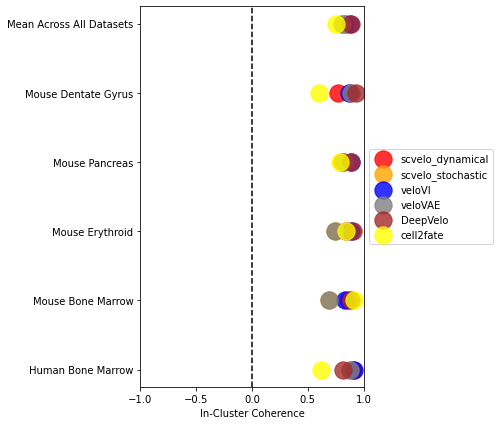

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(4,7))
ax.axvline(ymin = 0, ymax = len(tab_summary.columns), color = 'black', linestyle = '--')
ax.scatter(np.array(tab_summary.loc['scVelo',:]), list(range(len(tab_summary.columns))),
           label = 'scvelo_dynamical', color = 'red', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['scVelo_stochastic',:]), list(range(len(tab_summary.columns))),
           label = 'scvelo_stochastic', color = 'orange', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['VeloVI',:]), list(range(len(tab_summary.columns))),
           label = 'veloVI', color = 'blue', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['VeloVAE',:]), list(range(len(tab_summary.columns))),
           label = 'veloVAE', color = 'grey', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['DeepVelo',:]), list(range(len(tab_summary.columns))),
           label = 'DeepVelo', color = 'brown', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['cell2fate',:]), list(range(len(tab_summary.columns))),
           label = 'cell2fate', color = 'yellow', alpha = 0.8, s = 300)
ax.set_xlabel('In-Cluster Coherence')
ax.set_yticks(list(range(len(tab_summary.columns))))
# ax.set_yticklabels(tab_summary.columns)
ax.set_yticklabels(['Human Bone Marrow', 'Mouse Bone Marrow', 'Mouse Erythroid', 'Mouse Pancreas', 'Mouse Dentate Gyrus', 'Mean Across All Datasets'])
ax.set_xlim(-1,1)
ax.legend(frameon=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('/nfs/team283/aa16/cell2fate_paper_results/ICC_benchmarking.pdf', bbox_inches='tight')

In [11]:
for dataset in datasets:
    print(dataset)
    tab = pd.read_csv(save_dir + dataset + '_CBDC_scores.csv', index_col = 0)
    tab_summary.loc[:,dataset] = tab.loc[comparison, 'Mean']
tab_summary.loc[:, 'Mean Across All Data'] = np.mean(tab_summary, axis = 1)

HumanBoneMarrow
MouseBoneMarrow
MouseErythroid
Pancreas_with_cc
DentateGyrus


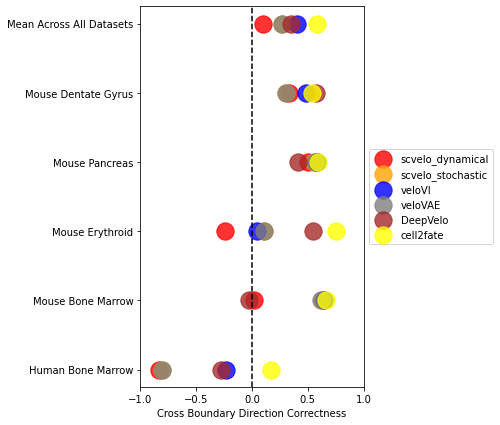

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(4,7))
ax.axvline(ymin = 0, ymax = len(tab_summary.columns), color = 'black', linestyle = '--')
ax.scatter(np.array(tab_summary.loc['scVelo',:]), list(range(len(tab_summary.columns))),
           label = 'scvelo_dynamical', color = 'red', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['scVelo_stochastic',:]), list(range(len(tab_summary.columns))),
           label = 'scvelo_stochastic', color = 'orange', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['VeloVI',:]), list(range(len(tab_summary.columns))),
           label = 'veloVI', color = 'blue', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['VeloVAE',:]), list(range(len(tab_summary.columns))),
           label = 'veloVAE', color = 'grey', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['DeepVelo',:]), list(range(len(tab_summary.columns))),
           label = 'DeepVelo', color = 'brown', alpha = 0.8, s = 300)
ax.scatter(np.array(tab_summary.loc['cell2fate',:]), list(range(len(tab_summary.columns))),
           label = 'cell2fate', color = 'yellow', alpha = 0.8, s = 300)
ax.set_xlabel('Cross Boundary Direction Correctness')
ax.set_yticks(list(range(len(tab_summary.columns))))
# ax.set_yticklabels(tab_summary.columns)
ax.set_yticklabels(['Human Bone Marrow', 'Mouse Bone Marrow', 'Mouse Erythroid', 'Mouse Pancreas', 'Mouse Dentate Gyrus', 'Mean Across All Datasets'])
ax.set_xlim(-1,1)
ax.legend(frameon=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('/nfs/team283/aa16/cell2fate_paper_results/CBDC_benchmarking.pdf', bbox_inches='tight')

In [13]:
tab_summary

,HumanBoneMarrow,MouseBoneMarrow,MouseErythroid,Pancreas_with_cc,DentateGyrus,Mean Across All Data
scVelo,-0.834022,0.019869,-0.245178,0.501404,0.328672,0.101227
scVelo_stochastic,-0.809160,0.624083,0.103058,0.558253,0.306031,0.264542
VeloVI,-0.231157,0.644327,0.043375,0.585209,0.487539,0.401370
cell2fate,0.169888,0.666890,0.753383,0.592413,0.539490,0.579100
VeloVAE,-0.809161,0.618357,0.109266,0.559883,0.306034,0.264893
DeepVelo,-0.278228,-0.029866,0.546476,0.409742,0.574891,0.350876
UniTVelo_unified,0.810154,-0.823446,0.836053,0.549499,0.070953,0.400137
UniTVelo_independent,-0.592724,0.642935,-0.308906,0.482571,0.560862,0.288291


In [14]:
import seaborn as sns

In [15]:
df = sns.load_dataset("penguins")

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

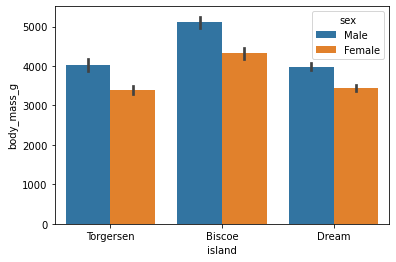

In [16]:
sns.barplot(data=df, x="island", y="body_mass_g", hue="sex")

In [17]:
tab_long = pd.melt(tab_summary, ignore_index = False)

In [18]:
tab_long['method'] = tab_long.index

In [19]:
tab_long['variable'][tab_long['variable'] == 'Pancreas_with_cc'] = 'MousePancreas'
tab_long['variable'][tab_long['variable'] == 'DentateGyrus'] = 'MouseDentateGyrus'

/tmp/ipykernel_20439/3656990627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_long['variable'][tab_long['variable'] == 'Pancreas_with_cc'] = 'MousePancreas'
/tmp/ipykernel_20439/3656990627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_long['variable'][tab_long['variable'] == 'DentateGyrus'] = 'MouseDentateGyrus'


In [20]:
tab_long['method'][tab_long['method'] == 'scVelo'] = 'scVelo_dynamical'

/tmp/ipykernel_20439/686541083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_long['method'][tab_long['method'] == 'scVelo'] = 'scVelo_dynamical'


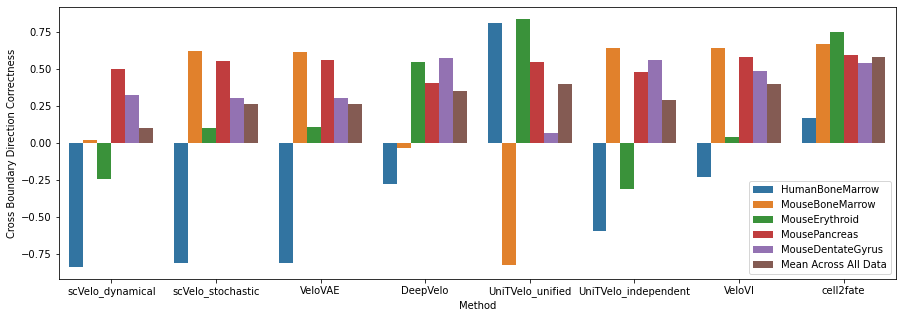

In [21]:
fig, ax = plt.subplots(1,1, figsize = (15, 5))
sns.barplot(data=tab_long, x="method", y="value", hue="variable", ax = ax,
           order= ['scVelo_dynamical', 'scVelo_stochastic', 'VeloVAE', 'UniTVelo_independent', 'DeepVelo', 'UniTVelo_unified', 'VeloVI', 'cell2fate'])
ax.set(xlabel='Method', ylabel='Cross Boundary Direction Correctness')
plt.gca().legend().set_title('')
plt.savefig('/nfs/team283/aa16/cell2fate_paper_results/CBDC_benchmarking.pdf', bbox_inches='tight')